# Preliminär analys av KTH's beviljandegrad för VR-NT ansökningar inom biologi

Jag har analyserat det dataset jag fick från Lucas Persson på VR, motaget via email 22 Feb 2017. Först läser jag in data från Excel. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

# Parse the excel spreadsheet
def read_ansok():
    df = pd.read_excel('NT2008-2016_anon.xlsx', sheetname='Lista', encoding = 'utf8')
    df = df.drop(['Dnr','Bidragsform',u'ÄmnesområdeRED','Inriktning',u'AntalBevÅr'], 1)
    df = df.rename(columns={u'Medelsförvaltare TABELL': 'Institut', u'HuvudBG': 'Beredningsgrupp'})
    df = df.assign(Biology = lambda x: ((x.SCB1 >= 10600.0) & (x.SCB1 < 10700.0)) | \
                   ((x.SCB2 >= 10600.0) & (x.SCB2 < 10700.0)) | \
                   ((x.SCB3 >= 10600.0) & (x.SCB3 < 10700.0)))
    df = df.drop(['SCB1','SCB2','SCB3','SCB4','SCB5'], 1)
    df = df.assign(KTH = lambda x: x.Institut == u'Kungliga Tekniska h\xf6gskolan')
    df = df.assign(Beviljad = lambda x: x.Beslut == u'Beviljad')
    return df

df = read_ansok()


### Data updelat på beredninsgrupper
Sedan delar jag up data i de nuvarande beredningsgrupper som handhar Biologi. Här lägger jag samman alla ansökningar, vilket i praktiken innebär 2012-2016.

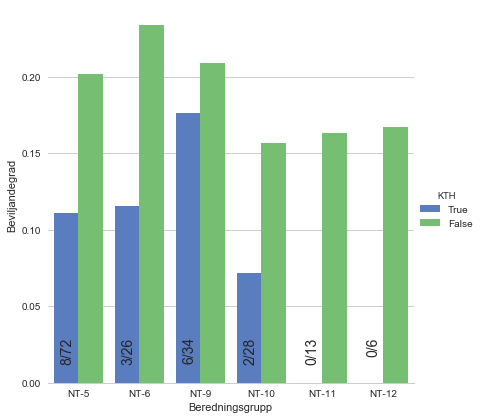

In [2]:
panels = ['NT-5','NT-6','NT-9','NT-10','NT-11','NT-12']
subset = df.loc[df['Beredningsgrupp'].isin(panels)]
import seaborn as sns
sns.set(style="whitegrid")
g = sns.factorplot(x="Beredningsgrupp", y="Beviljad", hue="KTH", data=subset,
                   size=6, kind="bar", palette="muted", ci=None, 
                   order = panels, hue_order = [True,False])
g.despine(left=True)
g.set_ylabels("Beviljandegrad")
x=0.15
for panel in panels:
  ss = subset.loc[subset['Beredningsgrupp'] == panel]
  ss = ss.loc[ss['KTH']]
  tot = len(ss.index)
  bev = len(ss.loc[ss["Beviljad"]].index)
  g.fig.text(x, 0.18,"%d/%d"%(bev,tot),fontsize=14,rotation="vertical")
  x += 0.124


Under 2008-2012 användes andra paneler, om vi plottar beviljandegraden innom dem får vi ett liknande resultat.

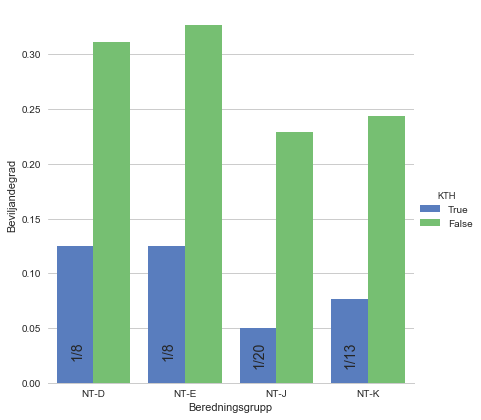

In [3]:
panels = ['NT-D','NT-E','NT-J','NT-K']
subset = df.loc[df['Beredningsgrupp'].isin(panels)]
import seaborn as sns
sns.set(style="whitegrid")
g = sns.factorplot(x="Beredningsgrupp", y="Beviljad", hue="KTH", data=subset,
                   size=6, kind="bar", palette="muted",
                   hue_order = [True,False], ci= None, order = panels)

g.despine(left=True)
g.set_ylabels("Beviljandegrad")
x=0.17
for panel in panels:
  ss = subset.loc[subset['Beredningsgrupp'] == panel]
  ss = ss.loc[ss['KTH']]
  tot = len(ss.index)
  bev = len(ss.loc[ss["Beviljad"]].index)
  g.fig.text(x, 0.17,"%d/%d"%(bev,tot),fontsize=14,rotation="vertical")
  x += 0.185


### Ansökningar updelat på SCB-kod
Om vi istället kollar på SCB-koder som relaterar till Biologiska vetenskaper, dvs 106XX, så kan vi bygga upp data över hela perioden 2008-2016. Övergripande ser vi en lägre beviljandegrad för KTH ansökningar.

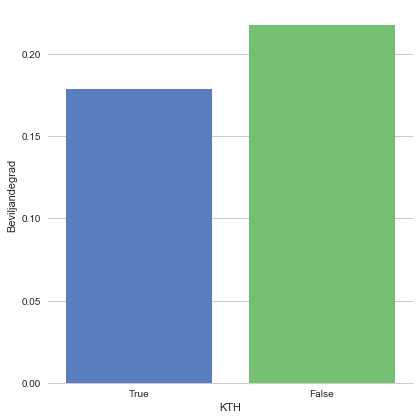

In [4]:
subset = df.loc[df['Biology']]
g = sns.factorplot("KTH", data=subset, y="Beviljad",
                   size=6, kind="bar", palette="muted",
                   order = [True,False], ci= None)
g.despine(left=True)
g.set_ylabels("Beviljandegrad")

Delar vi upp datat över tid ser vi oftast en lägre beviljandegrad för ansöningar från KTH, även om 2010 och 2013 utgör undantag.

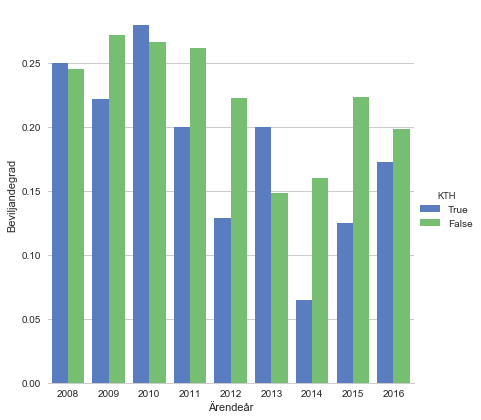

In [5]:
subset = df.loc[df['Biology']]
g = sns.factorplot(x=u'Ärendeår', y="Beviljad", hue="KTH", data=subset,
                   size=6, kind="bar", palette="muted",
                   hue_order = [True,False], ci= None)
g.despine(left=True)
g.set_ylabels("Beviljandegrad")

Samma data som tidserie

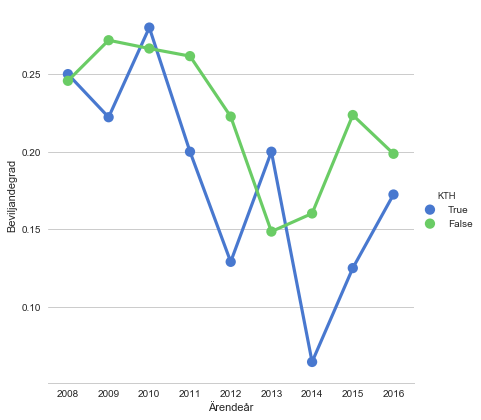

In [6]:
subset = df.loc[df['Biology']]
g = sns.factorplot(x=u'Ärendeår', y="Beviljad", hue="KTH", data=subset,
                   size=6, palette="muted",
                   hue_order = [True,False], ci= None)

g.despine(left=True)
g.set_ylabels("Beviljandegrad")